# Matrices

## 5.1

#### This exercise will help you gain familiarity with indexing matrix elements. Create a 
matrix using np.arange(12).reshape(3,4). Then write Python code to extract the element in the second row, fourth column. Use softcoding so that you can select different row/column indices. Print out a message like the following:

In [2]:
import numpy as np

matrix = np.arange(12).reshape(3,4)
matrix[2,3]

11

In [4]:
a,b = np.arange(12).reshape(3,4), np.arange(12).reshape(4,3)

a @ b

array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262]])

## Column Space
### Remember that a linear weighted combination of vectors involves scalar multiplying and summing a set of vectors. Two modifications to this concept will extend linear weighted combination to the column space of a matrix. First, we conceptualize a matrix as a set of column vectors. Second, we consider the infinity of real-valued scalars instead of working with a specific set of scalars. An infinite number of scalars gives an infinite number of ways to combine a set of vectors. That resulting infinite set of vectors is called the column space of a matrix.

## Column Space (Range):

#### The column space of a matrix is the set of all possible linear combinations of its column vectors. It represents all the vectors that can be obtained by applying the matrix to some vector x. Essentially, it's the space spanned by the columns of the matrix.

## Row Space:

#### The row space of a matrix is the set of all possible linear combinations of its row vectors. Like the column space but for rows, it represents all vectors that can be written as a linear combination of the rows of the matrix. The row space spans a subspace in the space where each dimension corresponds to a column of the matrix.

## Null Space (Kernel):

#### The null space of a matrix consists of all vectors x that satisfy the equation Ax=0, where A is the matrix and 0 is the zero vector. This space includes all solutions to the homogeneous system and represents directions in which the matrix reduces vectors to zero.

## Rank

#### Rank is a number associated with a matrix. It is related to the dimensionalities of matrix subspaces, and has important implications for matrix operations, including inverting matrices and determining the number of solutions to a system of equations. As with other topics in this book, there are rich and detailed theories of matrix rank, but here I will focus on what you need to know for data science and related applications.

In [5]:
import numpy as np

A = np.array([[1, 2],
              [3, 6]])
rank = np.linalg.matrix_rank(A)

print("The rank of the matrix A is:", rank)

The rank of the matrix A is: 1


## Determinant

#### The two most important properties of the determinant—​and the two most important take-home messages of this section—​are (1) it is defined only for square matrices and (2) it is zero for singular (reduced-rank) matrices.

#### The second take-home message about determinants is that they are zero for any reduced-rank matrix. 

## Characteristic Polynomial

#### The characteristic polynomial is, to use a technical term, super awesome. For one thing, it provides the remarkable insight that every square matrix can be expressed as an equation. And not just any equation—​an equation that directly links matrices to the fundamental theorem of algebra.

## Exercise 6.1

#### The norm of a matrix is related to the scale of the numerical values in the matrix. In this exercise, you will create an experiment to demonstrate this. In each of 10 experiment iterations, create a random numbers matrix and compute its Frobenius norm. Then repeat this experiment 40 times, each time scalar multiplying the matrix by a different scalar that ranges between 0 and 50. The result of the experiment will be a matrix of norms. Figure 6-7 shows the resulting norms, averaged over the 10 experiment iterations. This experiment also illustrates two additional properties of matrix norms: they are strictly nonnegative and can equal 0 only for the zeros matrix.

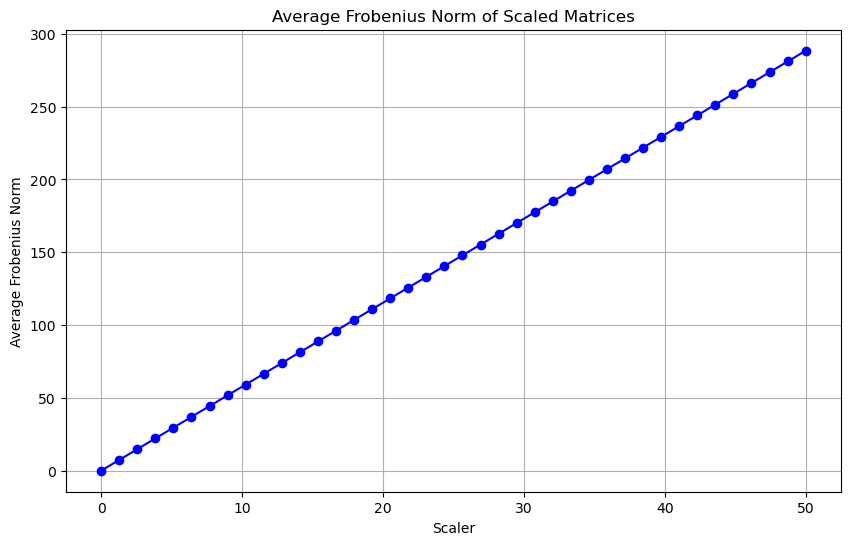

In [12]:
import numpy as np
import matplotlib.pyplot as plt

num_iterations = 10
scalers = np.linspace(0, 50, 40)
norms = np.zeros((len(scalers), num_iterations))

for i in range(num_iterations):
  A = np.random.rand(10,10)
  for j, scaler in enumerate(scalers):
    scaled_A = scaler * A
    norms[j, i] = np.linalg.norm(scaled_A, "fro")
    
average_norms = np.mean(norms, axis=1)
plt.figure(figsize=(10,6))
plt.plot(scalers, average_norms, marker="o", linestyle="-", color="b")
plt.title("Average Frobenius Norm of Scaled Matrices")
plt.xlabel("Scaler")
plt.ylabel("Average Frobenius Norm")
plt.grid(True)
plt.show()

## 6.2 Exercise

#### In this exercise, you will write an algorithm that finds a scalar that brings the Frobenius distance between two matrices to 1. Start by writing a Python function that takes two matrices (of the same size) as input and returns the Frobenius distance between them. Then create two 𝑁 × 𝑁random numbers matrices (I used 𝑁 =7 in the solutions code, but you can use any other size). Create a variable s = 1 that scalar multiplies both matrices. Compute the Frobenius distance between the scaled matrices. As long as that distance remains above 1, set the scalar to be .9 times itself and recompute the distance between the scaled matrices. This should be done in a while loop. When the Frobenius distance gets below 1, quit the while loop and report the number of iterations (which corresponds to the number of times that the scalar s was multiplied by .9) and the scalar value.

In [14]:
def frobenius_distance(A, B):
    """Compute the Frobenius distance between two matrices."""
    return np.linalg.norm(A - B, 'fro')

N = 7

A = np.random.rand(N, N)
B = np.random.rand(N, N)

s = 1.0
iterations =0

while True:
  scaled_A = s * A
  scaled_B = s * B
  
  distance = frobenius_distance(scaled_A, scaled_B)
  
  if distance <1:
    break
  
  s *= 0.9
  iterations +=1

print(f"Final scalar: {s}")
print(f"Number of iterations: {iterations}")
print(f"Frobenius distance: {distance}")

Final scalar: 0.34867844010000015
Number of iterations: 10
Frobenius distance: 0.9198968305030815


## Exercise 6-3.
#### Demonstrate that the trace method and the Euclidean formula produce the same result (the Frobenius norm). Does the trace formula work only for A^TA or AA^T , or do you get the same result?